$\newcommand{\ket}[1]{| #1 \rangle}$ 
$\newcommand{\bra}[1]{ \langle #1 |}$ 

# Teletransporte quântico

Vamos escrever um circuito para simular o problema de teletransporte quântico usando  [Qiskit](https://qiskit.org/) 

A documentação pode ser encontrada em:
[https://qiskit.org/textbook/ch-states/single-qubit-gates.html](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)


A ideia de teletransporte remete a filmes de ficção científica: um objeto é desmontado de um ponto $A$ e remontado em um ponto $B$ sem ser fisicamente entre esses dois pontos.

Um protocolo para teletransporte quântico foi proposto em 1993 no paper ["Teleporting an unknown quantum state via dual classical and Einstein-Podolsky-Rosen channels"](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1895) de Bennet e outros pesquisadores. Nesse protocolo, a ideia não é transmitir matéria entre dois estados, mas, sim, a informação quântica codificada em um estado $\ket{\psi}$. A proposta seria desmontar $\ket{\psi}$ em um ponto $A$ (por exemplo, um laboratório na China) e reconstruí-lo em um ponto $B$ (por exemplo, um laboratório nos EUA) usando apenas informação clássica. Isso somente seria possível quando o remetente em $A$ e o destinatário em $B$ compartilham um par emaranhado.  

Essa ideia foi testada experimentalmente em 2012 em dois laboratórios localizados nas ilhas La Palma e Tenerife distantes fisicamente a 143km. O resultado saiu no PNAS ["Teleportation of entanglement over 143 km"](https://www.pnas.org/doi/10.1073/pnas.1517007112).


## Protocolo de teletransporte
Alice, um remetente em $A$ gostaria de enviar informação quântica codificada em um estado $\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$ para Bob, o destinatário localizado em $B$. 

<img src="https://www.dropbox.com/scl/fi/c78beupnljeoqzd8z322y/figura_teletransporte.png?rlkey=5cf0e1vele178o6kf121peopq&dl=0" style="height:50px" />

![protocolo](https://www.dropbox.com/scl/fi/c78beupnljeoqzd8z322y/figura_teletransporte.png?rlkey=5cf0e1vele178o6kf121peopq&dl=0)



Alice tem dois qubits: $D$ um qubit para guardar informação sobre esse estado e outro qubit $A$ que está emaranhado com Bob em algum dos estados da base de Bell:

$$
\begin{align*}
\ket{B_{00}} = \ket{\Phi^+} & = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})\\
\ket{B_{01}} = \ket{\Phi^-} & = \frac{1}{\sqrt{2}}(\ket{00} - \ket{11})\\
\ket{B_{10}} = \ket{\Psi^+} & = \frac{1}{\sqrt{2}}(\ket{01} + \ket{10})\\
\ket{B_{11}}= \ket{\Psi^-} & = \frac{1}{\sqrt{2}}(\ket{01} - \ket{01})
\end{align*}
$$


Bob tem um qubit $B$.

Consideremos que $\ket{\Psi_{AB}} = \ket{\Phi^+_{AB}}$
Assim, o estado inicial total é

$$
\ket{\Psi_{DAB}} = \ket{\psi_D} \otimes \ket{\Phi^+_{AB}}
$$


Decompondo esse estado, conseguimos mostrar que ele é equivalente a 

$$
\begin{align*}
\ket{\Psi_{DAB}} & = \frac{1}{\sqrt{2}} 
(\alpha \ket{0_D 0_A 0_B } + \alpha \ket{0_D 1_A 1_B}
+ \beta \ket{1_D 1_A 0_B} + \beta \ket{1_D 0_A 1_B}
)
\end{align*}
$$

Alice pode fazer uma medida dos seus dois qubits na base de Bell usando os projetores 

$$
\begin{align*}
\hat{P_0} & = \ket{\Psi_{DA}^-} \bra{\Psi_{DA}^-}\\
\hat{P_1} & = \ket{\Phi_{DA}^-} \bra{\Phi_{DA}^-}\\
\hat{P_2} & = \ket{\Phi_{DA}^+} \bra{\Phi_{DA}^+}\\
\hat{P_3} & = \ket{\Psi_{DA}^+} \bra{\Psi_{DA}^+}\\
\end{align*}
$$

Para isso, ela precisa aplicar um CNOT usando o qubit $D$ como controle e o $A$ como target e um Hadamard no seu qubit $D$. Fazendo isto, o resultado é 

$$
\begin{align*}
H_A \text{CNOT}(D,A) \ket{\Psi_{DAB}} & = \hphantom{+}
\frac{1}{2} 
\ket{0_D 0_A} (\alpha \ket{0_B} + \beta \ket{1_B}) \\ 
& \quad 
+ \frac{1}{2}  \ket{0_D 1_A} (\alpha \ket{1_B} + \beta \ket{0_B}) \\ 
& \quad 
+ \frac{1}{2}  \ket{1_D 0_A} (\alpha \ket{0_B} - \beta \ket{1_B}) \\
& \quad 
+ \frac{1}{2} \ket{1_D 1_A} (\alpha \ket{1_B} + \beta \ket{0_B})
\end{align*}
$$

Veja que 
$$
\begin{align*}
(\alpha \ket{0_B} + \beta \ket{1_B}) & = I \ket{\psi}\\ 
(\alpha \ket{1_B} + \beta \ket{0_B}) &= X \ket{\psi} \\ 
(\alpha \ket{0_B} - \beta \ket{1_B}) & = Z \ket{\psi}\\
(\alpha \ket{1_B} + \beta \ket{0_B}) & = i Y \ket{\psi} = XZ \ket{\psi}
\end{align*}
$$

Agora, Alice faz uma medida na base computacional $\ket{0}$ e $\ket{1}$ dois seus dois qubits e envia a Bob. Veja que o estado no qubit $B$ agora é uma das matrizes de Pauli aplicada no estado original. 
Bob pode usar essa informação para aplicar uma unitária ($X,Y,Z,I$) para reverter seu estado para o estado original $\ket{\psi}$.


| Código de Alice | Unitária de Bob |
|:--------:|:--------:|
|  00   |  $I$   |
|  01   |  $X$   | 
|  10   |  $Z$   |
|  11   |  $XZ$  |


### Simulando com qiskit

Abaixo o código qiskit

In [14]:
# bibliotecas de import do qiskit 

# Qiskit -  circuitos e registradores 
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile

# Qiskit - ferramentas de quantum information
from qiskit.quantum_info import random_unitary


# Qiskit - visualizando
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

# Qiskit - processando os resultados
from qiskit.result import marginal_counts

# Qiskit - Simulador
from qiskit_aer import AerSimulator

'''
# Qiskit - Simulator para rodar na sua conta da IBM, neste caso 
from qiskit import Aer, execute
from qiskit import IBM
provider = IBMQ.load_account()
backend = Aer.get_backend('aer_simulator') 

'''

"\n# Qiskit - Simulator para rodar na sua conta da IBM, neste caso \nfrom qiskit import Aer, execute\nfrom qiskit import IBM\nprovider = IBMQ.load_account()\nbackend = Aer.get_backend('aer_simulator') \n\n"

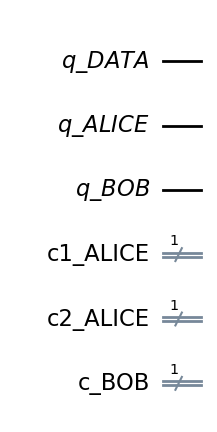

In [7]:
# circuito

# registradores quânticos para Alice e Bob
qubit_data = QuantumRegister(1, "q_DATA")
qubit_alice = QuantumRegister(1, "q_ALICE")
qubit_bob = QuantumRegister(1, "q_BOB")

# registradores clássicos para guargard a medida
cbit_alice_1 = ClassicalRegister(1, "c1_ALICE")
cbit_alice_2 = ClassicalRegister(1, "c2_ALICE")
cbit_bob = ClassicalRegister(1, "c_BOB")


# criando o circuito a partir dos registradores 
qc = QuantumCircuit(qubit_data, qubit_alice, qubit_bob, cbit_alice_1, cbit_alice_2, cbit_bob)


qc.draw("mpl")

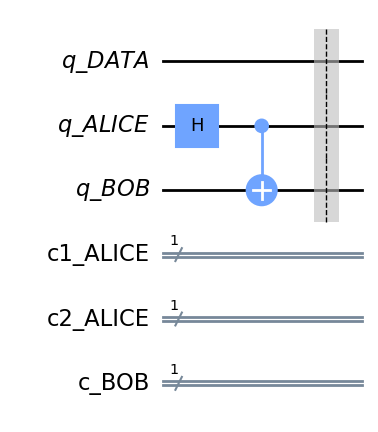

In [8]:
# criação do par EPR entre Bob e Alice
qc.h(qubit_alice[0])
qc.cx(qubit_alice[0], qubit_bob[0])
qc.barrier()  

qc.draw("mpl")

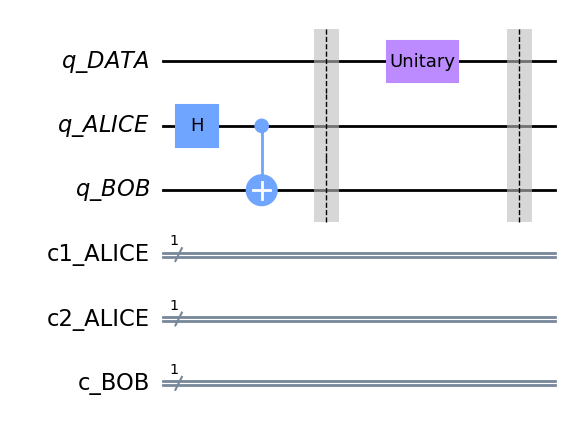

In [9]:
# preparação do estado a ser transmitido
U = random_unitary(2)
U_gate = U.to_instruction()
U_dagger_gate = U.adjoint().to_instruction()
qc.append(U_gate, [qubit_data[0]])
qc.barrier()  

qc.draw("mpl")

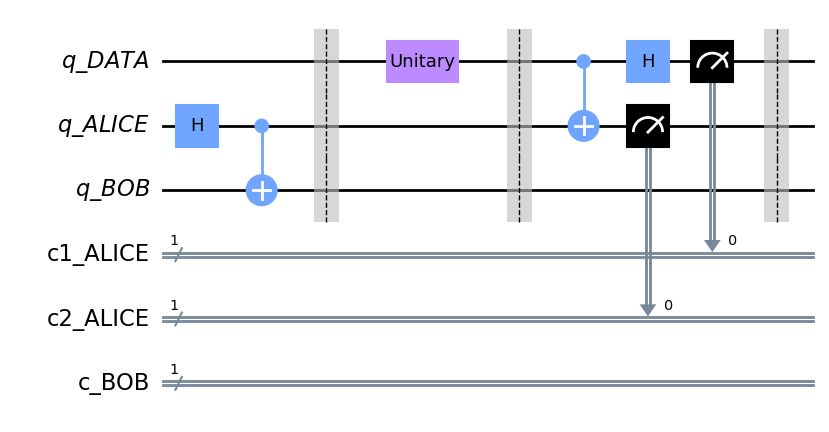

In [10]:
# medida de Alice, qubits D, A na base de Bell 
qc.cx(qubit_data[0], qubit_alice[0])
qc.h(qubit_data[0])
qc.measure(qubit_data[0], cbit_alice_1[0])
qc.measure(qubit_alice[0], cbit_alice_2[0])
qc.barrier()

qc.draw("mpl")

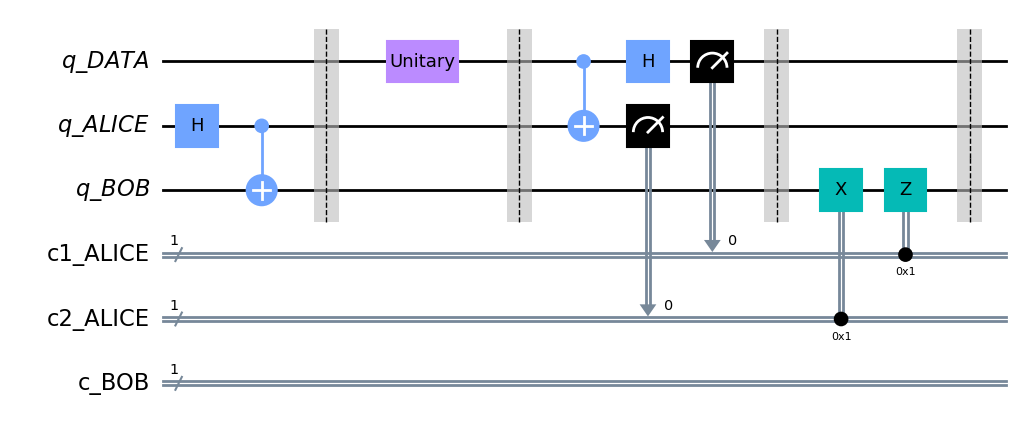

In [11]:
# unitárias que Bob tem que aplicar conforme o resultado enviado por Alice
qc.x(qubit_bob[0]).c_if(cbit_alice_2, 1)
qc.z(qubit_bob[0]).c_if(cbit_alice_1, 1)
qc.barrier()

qc.draw("mpl")

/Users/krissia/Library/Python/3.9/lib/python/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


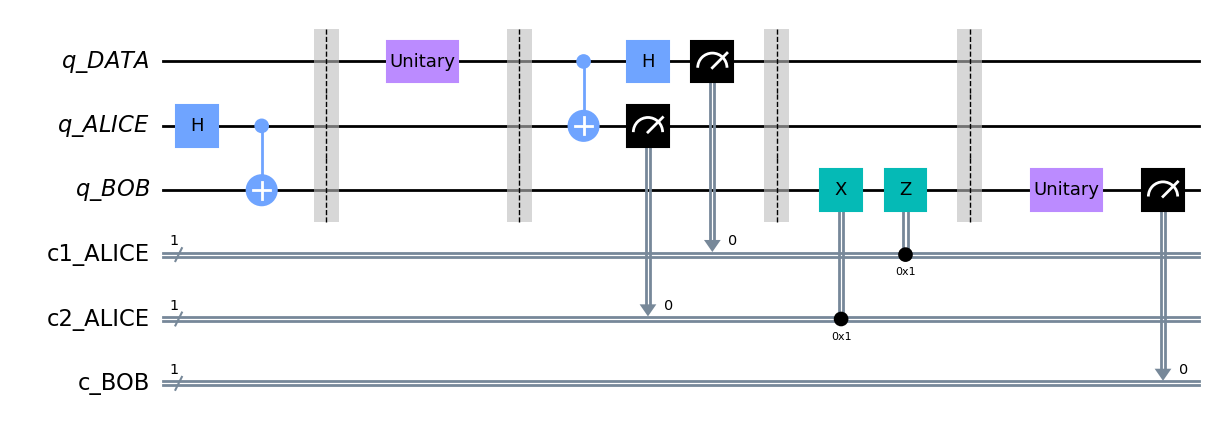

In [3]:
qc.draw("mpl")

Podemos verificar se o resultado do estado teletransportado foi correto aplicando o gate inverso criado para preparar o estado em $D$ no qubit $B$. Se ele retornar ao estado inicial $\ket{0}$, obtemos o resultado certo!

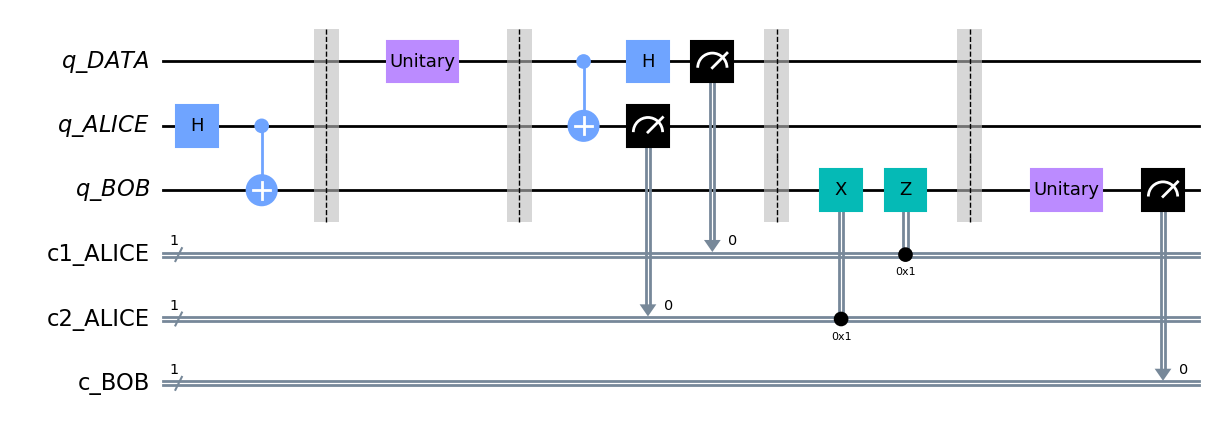

In [12]:
# checa para ver se o estado foi transmitido corretamente. 
# A operação de preparação inversa retorna o estado original dos qubits |0>
qc.append(U_dagger_gate, [qubit_bob[0]])

qc.measure(qubit_bob[0], cbit_bob[0])

qc.draw("mpl")

{'0': 1000}


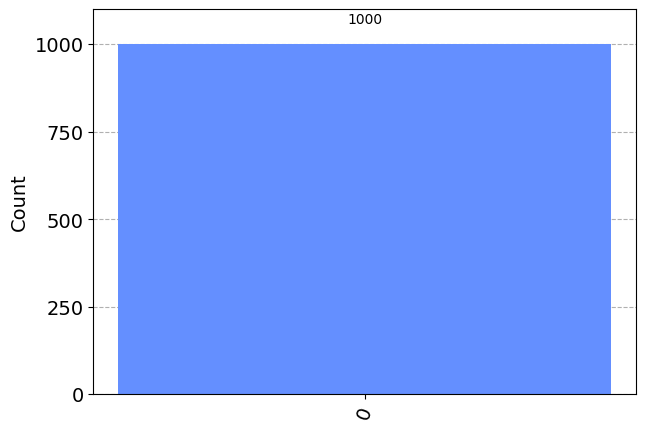

In [16]:
# simulando o circuito com o simulador do Qiskit

# transpila o circuito
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)


# simula o resultado
job = simulator.run(compiled_circuit, shots = 1000)

result = job.result()
counts = result.get_counts()

# processa o resultado 
marginal_result = marginal_counts(result.get_counts(), indices=[2])
print(marginal_result)

# mostra o resultado
plot_histogram(marginal_result)